# Load data

In [1]:
from utils import jsonfile
from utils import datautil
    
data = jsonfile.read('data_splitted/laroseda_train.json')['reviews']
train_data, validation_data = datautil.split(data, test_split=2000)
test_data = jsonfile.read('data_splitted/laroseda_test.json')['reviews']

In [2]:
print(f'Reviews for train     : {len(train_data)}')
print(f'Reviews for validation: {len(validation_data)}')
print(f'Reviews for test      : {len(test_data)}')

Reviews for train     : 10000
Reviews for validation: 2000
Reviews for test      : 3000


# Data exploration

In [3]:
print(train_data[0])

{'index': '9336', 'title': 'Nu merita nici jumatate din pret!!', 'content': 'se misca execrabil!!! se blocheaza des!!! nici daca ar fi gratuita nu as mai luat-o!! bateria tine ok, dar la ce fost daca se blocheaza cand deschizi 2 aplicatii, doar atat?', 'starRating': '1'}


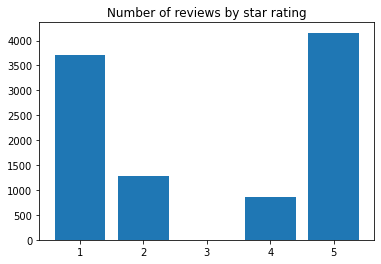

In [4]:
ratings = [0 for i in range(5)] 
for entry in train_data:
    ratings[ord(entry['starRating']) - ord('1')] += 1
    
import matplotlib.pyplot as plt

x = ['1', '2', '3', '4', '5']
plt.title('Number of reviews by star rating')
plt.bar(x, ratings)
plt.show()

# Cleanup

In [5]:
x_train, y_train = datautil.clean(train_data)
x_val, y_val = datautil.clean(validation_data)
x_test, y_test = datautil.clean(test_data)

We'll assign the '0' label for negative reviews (with 1- or 2-star ratings) and '1' for the positive reviews (with 4- or 5-star ratings).

We'll merge the title and the content to a common 'text' field which is cleaned.

# Post-cleanup

In [6]:
print(x_train[0])
print(y_train[0])

nu merita nici jumatate din pret se misca execrabil se blocheaza des nici daca ar fi gratuita nu as mai luato bateria tine ok dar la ce fost daca se blocheaza cand deschizi 2 aplicatii doar atat
0


# Embedding layer approach - dimension: 100

In [7]:
from approach import naive_embedding

x = x_train + x_val
y = y_train + y_val

config = naive_embedding.Config(x, y, 100, 10000, 100)
model, history = naive_embedding.train(config)
model.summary()

2021-12-01 14:19:46.114666: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Found 21090 unique tokens.
Shape of data tensor: (12000, 100)
Shape of label tensor: (12000,)


2021-12-01 14:19:47.377020: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-01 14:19:47.377685: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-01 14:19:47.411670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 14:19:47.411829: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2021-12-01 14:19:47.411848: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-12-01 14:19:47.413020: I tensorflow/stream_executor/platform/defa

Epoch 1/5
  1/300 [..............................] - ETA: 2:19 - loss: 0.6910 - acc: 0.5312

2021-12-01 14:19:48.250951: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


300/300 [==============================] - 2s 5ms/step - loss: 0.5074 - acc: 0.7326 - val_loss: 0.3054 - val_acc: 0.8604
Epoch 2/5
300/300 [==============================] - 1s 3ms/step - loss: 0.2017 - acc: 0.9198 - val_loss: 0.2831 - val_acc: 0.8767
Epoch 3/5
300/300 [==============================] - 1s 3ms/step - loss: 0.0891 - acc: 0.9695 - val_loss: 0.3372 - val_acc: 0.8733
Epoch 4/5
300/300 [==============================] - 1s 3ms/step - loss: 0.0433 - acc: 0.9857 - val_loss: 0.4936 - val_acc: 0.8500
Epoch 5/5
300/300 [==============================] - 1s 3ms/step - loss: 0.0186 - acc: 0.9940 - val_loss: 0.6194 - val_acc: 0.8471
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_____

### Plotting accuracy

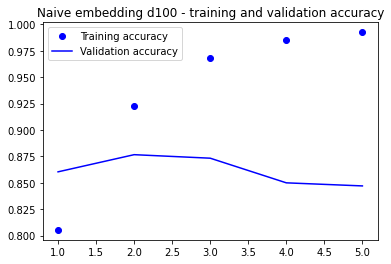

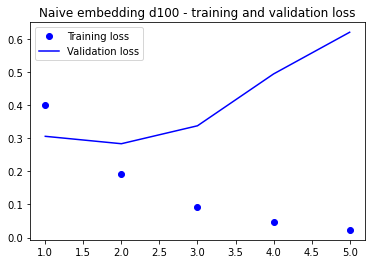

In [8]:
from utils import plotting
plotting.plot(history, 'Naive embedding d100')

### Evaluating approach

In [9]:
loss, acc = naive_embedding.evaluate_model(model, config, x_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {acc * 100:.2f}%')

94/94 [==============================] - 0s 2ms/step - loss: 0.6677 - acc: 0.8397
Loss: 0.6676753163337708
Accuracy: 83.97%


In [10]:
naive_embedding.predict_sample(model, config, x_test, y_test, 100)

Sample #100:
Input: foarte slab foarte dezamagit bateria nu tine deloc si mai ales ca produsul chiar daca era impachetat ok are si o mica zgarietura pe partea lucioasa
Expected output: 0
Prediction: [0.51914626]


# Embedding layer approach - dimension: 1000

In [11]:
from approach import naive_embedding

x = x_train + x_val
y = y_train + y_val

config = naive_embedding.Config(x, y, 1000, 10000, 1000)
model, history = naive_embedding.train(config)
model.summary()

Found 21090 unique tokens.
Shape of data tensor: (12000, 1000)
Shape of label tensor: (12000,)
Epoch 1/5
300/300 [==============================] - 23s 77ms/step - loss: 3.2840 - acc: 0.6607 - val_loss: 0.2919 - val_acc: 0.8796
Epoch 2/5
300/300 [==============================] - 23s 77ms/step - loss: 0.2299 - acc: 0.9214 - val_loss: 0.2899 - val_acc: 0.8858
Epoch 3/5
300/300 [==============================] - 23s 77ms/step - loss: 0.1283 - acc: 0.9585 - val_loss: 0.3326 - val_acc: 0.8846
Epoch 4/5
300/300 [==============================] - 23s 77ms/step - loss: 0.0667 - acc: 0.9825 - val_loss: 0.3777 - val_acc: 0.8883
Epoch 5/5
300/300 [==============================] - 23s 78ms/step - loss: 0.0460 - acc: 0.9856 - val_loss: 0.5063 - val_acc: 0.8692
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 1000)        10000000  
____________________

### Plotting accuracy

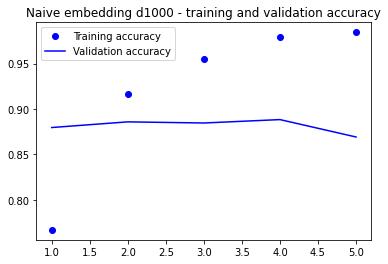

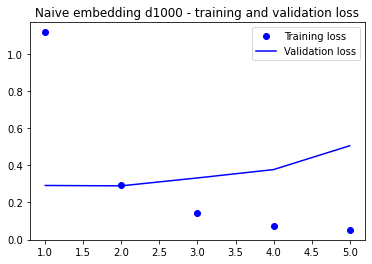

In [12]:
from utils import plotting
plotting.plot(history, 'Naive embedding d1000')

### Evaluating the approach

In [13]:
loss, acc = naive_embedding.evaluate_model(model, config, x_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {acc * 100:.2f}%')

94/94 [==============================] - 3s 26ms/step - loss: 0.5179 - acc: 0.8647
Loss: 0.5178500413894653
Accuracy: 86.47%


In [15]:
naive_embedding.predict_sample(model, config, x_test, y_test, 100)

Sample #100:
Input: foarte slab foarte dezamagit bateria nu tine deloc si mai ales ca produsul chiar daca era impachetat ok are si o mica zgarietura pe partea lucioasa
Expected output: 0
Prediction: [0.8432302]
